In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

In questa esercitazione, vedremo come utilizzare la regressione per predire il costo del biglietto per un passeggero del Titanic conoscendone età e sesso.

## Parte 1: lettura di dati

Per iniziare, leggiamo i dati dal nostro dataset, e selezioniamo esclusivamente le colonne di nostro interesse. Eliminiamo inoltre i dati che presentano valori mancanti.

In [2]:
df = pd.read_csv('../dataset/train.csv')
df = df[['Sex', 'Age', 'Fare']]
df.dropna(axis=0, inplace=True)

## Parte 2: preprocessing

Notiamo che la colonna `Sex` ha valori rappresentati sotto forma di stringa. Questo tipo di feature, chiamato *categorical*, non può essere utilizzato "as is" per la risoluzione del problema della regressione: di conseguenza, dovremo utilizzare un [`OrdinalEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) che associerà un numero a tutti i valori possibili.

Per farlo, dovremo in primis creare un vettore colonna a partire dai valori relativi della colonna `Sex`, e poi trasformarlo alla solita maniera.

In [3]:
s = df['Sex'].to_numpy().reshape(-1, 1)
enc = OrdinalEncoder()
s_tr = enc.fit_transform(s)

Creiamo ora gli array `X` ed `y` necessari per la regressione.

In [4]:
a = df['Age'].to_numpy().reshape(-1, 1)
y = df['Fare'].to_numpy().reshape(-1, 1)
X = np.append(s_tr, a, axis=1)

Proviamo a plottare i diversi valori di età in funzione dell'indice del passeggero. Ovviamente, ci aspettiamo che non vi sia alcuna correlazione tra l'indice ed l'età.

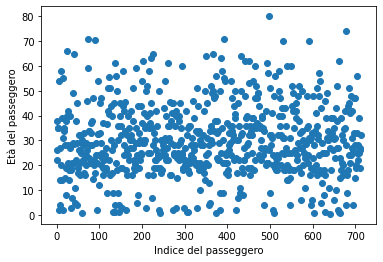

In [5]:
fig, ax = plt.subplots()
ax.scatter(np.arange(X.shape[0]), X[:, 1], label='Età')
ax.set_xlabel('Indice del passeggero')
ax.set_ylabel('Età del passeggero')
plt.show()

La nostra ipotesi è verificata. Possiamo quindi passare ad addestrare il regressore.

## Parte 3: addestramento del regressore

Addestriamo un regressore, ed usiamo in tal senso una cross validazione con $k=10$. Proviamo con un albero decisionale.

Come metrica di scoring, usiamo `neg_mean_squared_error`, che segue la convenzione *the higher, the better*. Ulteriori informazioni a [questo link](https://stackoverflow.com/a/48246255/4458173).

In [6]:
dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X, y, scoring='neg_mean_squared_error', cv=10))

-3375.830023656226

Proviamo anche ad usare un Random Forest.

In [7]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X, y.ravel(), scoring='neg_mean_squared_error', cv=10))

-3240.7326404422092

Il risultato è praticamente identico, per cui possiamo tranquillamente usare l'albero decisionale, che risulta essere meno oneroso dal punto di vista computazionale.

## Parte 4: fitting e predizioni

Proviamo quindi a fittare il nostro albero decisionale sul problema, ed effettuare predizioni su nuovi dati.

In [8]:
dt.fit(X, y)

print('Costo del biglietto predetto per una donna di 50 anni:\t{}'.format(
    round(dt.predict(np.array([[0, 50]]))[0], 2)))
print('Costo del biglietto predetto per un uomo di 20 anni:\t{}'.format(
    round(dt.predict(np.array([[1, 20]]))[0], 2)))
print('Costo del biglietto predetto per una bambina di 2 anni:\t{}'.format(
    round(dt.predict(np.array([[0, 2]]))[0], 2)))

Costo del biglietto predetto per una donna di 50 anni:	64.65
Costo del biglietto predetto per un uomo di 20 anni:	8.53
Costo del biglietto predetto per una bambina di 2 anni:	43.25


**Note finali**: è importante notare come l'errore sia abbastanza alto, ed alcune predizioni non siano realistiche. Ciò è legato al fatto che il dataset è plausibilmente affetto dalla curse of dimensionality, e che gli iperparametri per i regressori sono probabilmente subottimali.

Per mitigare il secondo problema, potremmo usare un oggetto di tipo [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), che vedremo in azione in una delle prossime lezioni.